<a href="https://colab.research.google.com/github/Ayat166/housing-preprocessing/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/housing.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male


In [ ]:
data.isna().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

In [ ]:
data.drop('gender', inplace=True, axis=1)

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(6), int64(2), object(2)
memory usage: 1.6+ MB


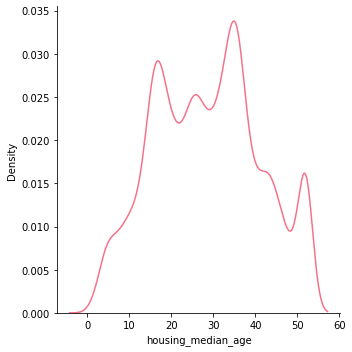

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("husl")
sns.displot(data=data, x="housing_median_age", kind="kde")

In [ ]:
data["housing_median_age"].fillna(data["housing_median_age"].mode()[0], inplace=True)

In [ ]:
data["housing_median_age"].isnull().sum()

0

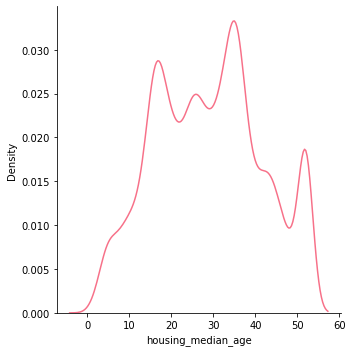

In [ ]:
sns.set_palette("husl")
sns.displot(data=data, x="housing_median_age", kind="kde")

In [ ]:
data.isna().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
dtype: int64

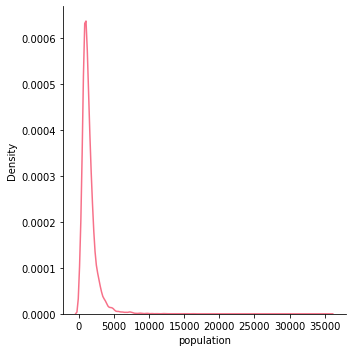

In [ ]:
sns.set_palette("husl")
sns.displot(data=data, x="population", kind="kde")

In [ ]:
data["population"].fillna(data["population"].mean(), inplace=True)

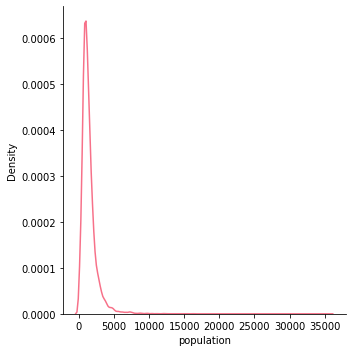

In [ ]:
sns.set_palette("husl")
sns.displot(data=data, x="population", kind="kde")

In [ ]:
data.isna().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        4882
population               0
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
dtype: int64

In [ ]:
data['households'].value_counts()

no      3080
282       47
375       46
380       45
306       45
        ... 
1649       1
1879       1
1050       1
1119       1
1843       1
Name: households, Length: 1703, dtype: int64

In [ ]:
data.loc[data['households'] == 'no' , 'households'] = 0

In [ ]:
data['households'].value_counts()

0       3080
282       47
375       46
380       45
306       45
        ... 
1649       1
1879       1
1050       1
1119       1
1843       1
Name: households, Length: 1703, dtype: int64

In [ ]:
data["households"] = pd.to_numeric(data["households"], downcast="float")

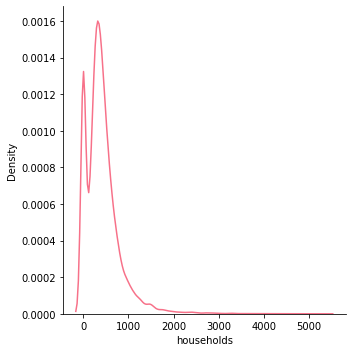

In [ ]:
sns.set_palette("husl")
sns.displot(data=data, x="households", kind="kde")

In [ ]:
import numpy as np
fill_list = [0,282,375 ]
data["households"] = data["households"].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

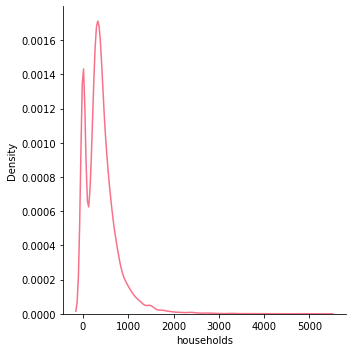

In [ ]:
sns.set_palette("husl")
sns.displot(data=data, x="households", kind="kde")

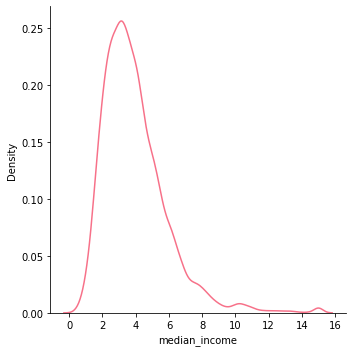

In [ ]:
sns.set_palette("husl")
sns.displot(data=data, x="median_income", kind="kde")

In [ ]:
data['median_income'].value_counts()

15.0001    49
2.8750     40
4.1250     40
2.6250     38
3.1250     38
           ..
3.2920      1
3.0727      1
5.2329      1
7.7307      1
2.3886      1
Name: median_income, Length: 11576, dtype: int64

In [ ]:
fill_list = data['median_income']
data["median_income"] = data["median_income"].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

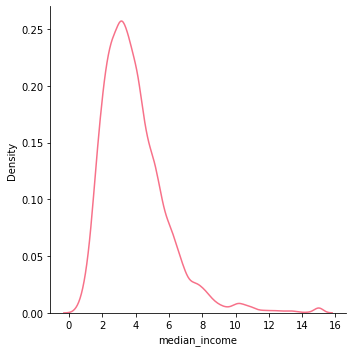

In [ ]:
sns.set_palette("husl")
sns.displot(data=data, x="median_income", kind="kde")

In [ ]:
data["median_income"].isnull().sum()

0

In [ ]:
data.isna().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        4882
population               0
households               0
median_income            0
median_house_value       0
ocean_proximity          0
dtype: int64

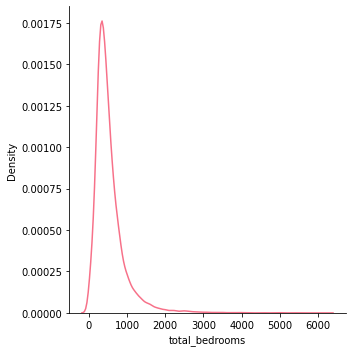

In [ ]:
sns.set_palette("husl")
sns.displot(data=data, x="total_bedrooms", kind="kde")

In [ ]:
data['total_bedrooms'].value_counts()

280.0     43
345.0     42
322.0     41
309.0     40
348.0     40
          ..
1623.0     1
981.0      1
1877.0     1
1911.0     1
1103.0     1
Name: total_bedrooms, Length: 1822, dtype: int64

In [ ]:
fill_list = [280.0, 345.0 , 322.0 , 309.0 , 348.0 ]
data["total_bedrooms"] = data["total_bedrooms"].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

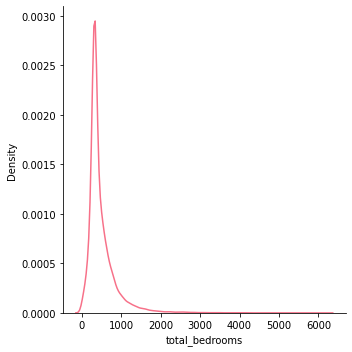

In [ ]:
sns.set_palette("husl")
sns.displot(data=data, x="total_bedrooms", kind="kde")

In [ ]:
data["total_bedrooms"].isnull().sum()

0

In [ ]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Handel Categorical data

In [ ]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['ocean_proximity'] = labelencoder.fit_transform(data['ocean_proximity'])


In [ ]:
data["ocean_proximity"] = pd.to_numeric(data["ocean_proximity"], downcast="integer")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float32
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int8   
dtypes: float32(1), float64(6), int64(2), int8(1)
memory usage: 1.4 MB


In [ ]:
data.drop_duplicates()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,129.0,322.000000,126.0,8.3252,452600,3
1,-122.22,37.86,21.0,7099,1106.0,2401.000000,1138.0,8.3014,358500,3
2,-122.24,37.85,52.0,1467,190.0,496.000000,177.0,7.2574,352100,3
3,-122.25,37.85,52.0,1274,235.0,558.000000,219.0,5.6431,341300,3
4,-122.25,37.85,52.0,1627,280.0,1424.928724,259.0,3.8462,342200,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.000000,330.0,1.5603,78100,1
20636,-121.21,39.49,18.0,697,150.0,356.000000,114.0,2.5568,77100,1
20637,-121.22,39.43,17.0,2254,485.0,1007.000000,433.0,1.7000,92300,1
20638,-121.32,39.43,18.0,1860,409.0,741.000000,349.0,1.8672,84700,1


2- Identifying & handling outliers


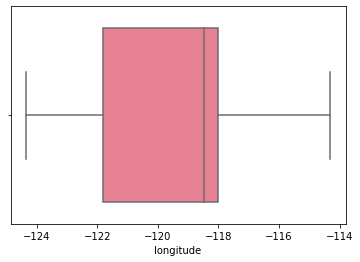

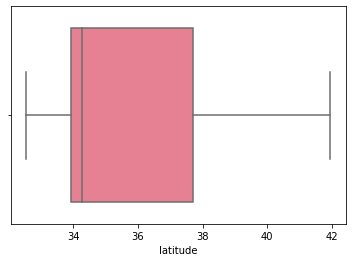

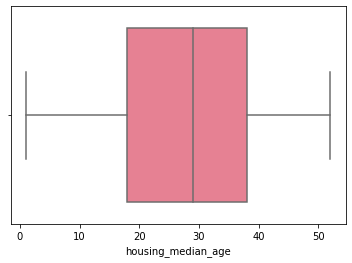

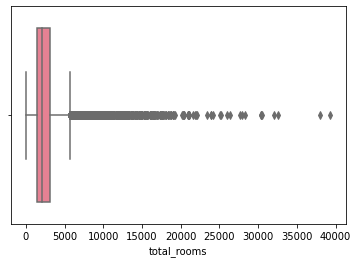

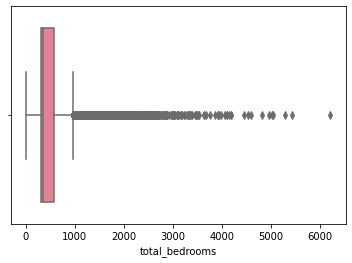

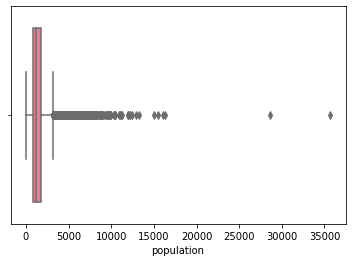

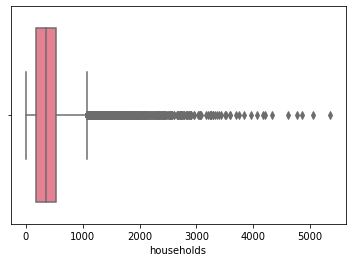

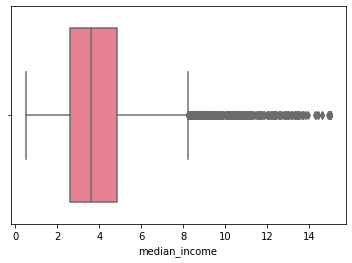

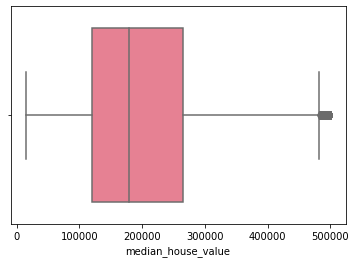

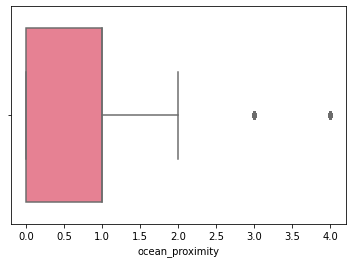

In [ ]:
for col in data.columns:
    if data[col].dtype != 'object':
        bp = sns.boxplot(data = data, x = col)
        plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scale the out_df between 0 and 1
df_scaled = scaler.fit_transform(data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['longitude'	,'latitude'	,'housing_median_age','total_rooms',	'total_bedrooms',	'population',	'households',	'median_income',	'median_house_value','ocean_proximity'])

print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

Scaled Dataset Using MinMaxScaler


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.022331,0.020615,0.008941,0.023516,0.539668,0.902266,0.75
1,0.212151,0.565356,0.392157,0.180503,0.177967,0.067210,0.212393,0.538027,0.708247,0.75
2,0.210159,0.564293,1.000000,0.037260,0.030440,0.013818,0.033035,0.466028,0.695051,0.75
3,0.209163,0.564293,1.000000,0.032352,0.037687,0.015555,0.040873,0.354699,0.672783,0.75
4,0.209163,0.564293,1.000000,0.041330,0.044935,0.039853,0.048339,0.230776,0.674638,0.75
